# Lab 1 for Machine learning lection
### Date: 2022-03-09

Den här labben är uppdelad i två delmoment:
- Recommender system
- Disease prediction

## Recommender system
När du tittar på Youtube, beställer mat online, köper böcker online, lyssnar på Spotify, använder LinkedIn så
får du ständigt rekommendationer för nya videoklipp, maträtter mm. Det som ligger bakom dessa är en typ
av rekommenderarsystem.


Nu ska du ladda ned datasetet ml-latest.zip under sektionen "recommended for education and
development". Ladda in dataseten "movies.csv" och "ratings.csv" besvara på följande frågor:
- a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,
utan försök undersöka fler aspekter av datan.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

plt.style.use('seaborn-white')

In [3]:
movies = pd.read_csv('ml-latest/movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed)
58094,193878,Les tribulations d'une caissière (2011),Comedy
58095,193880,Her Name Was Mumu (2016),Drama
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi


In [4]:
movies['movieId'].nunique()

58098

In [5]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
movieId,58098.0,111919.516197,59862.660956,1.0,72437.75,126549.0,161449.5,193886.0


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [7]:
ratings = pd.read_csv('ml-latest/ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [8]:
ratings[['userId', 'movieId']].nunique()

userId     283228
movieId     53889
dtype: int64

In [9]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,27753444.0,1.419420e+05,8.170740e+04,1.0,71176.0,1.420220e+05,2.124590e+05,2.832280e+05
movieId,27753444.0,1.848800e+04,3.510263e+04,1.0,1097.0,2.716000e+03,7.150000e+03,1.938860e+05
rating,27753444.0,3.530445e+00,1.066353e+00,0.5,3.0,3.500000e+00,4.000000e+00,5.000000e+00
timestamp,27753444.0,1.193122e+09,2.160482e+08,789652004.0,998605251.0,1.174256e+09,1.422744e+09,1.537945e+09


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [25]:
df = pd.merge(ratings, movies, on="movieId").drop(columns='timestamp')

In [26]:
df[df['movieId']==1]

,userId,movieId,rating,title,genres
371446,4,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
371447,10,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
371448,14,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
371449,15,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
371450,22,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...
439910,283208,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
439911,283215,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
439912,283217,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
439913,283219,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [27]:
genres = movies.genres.str.split("|") # extract every genre of every movie
allgenres = set(genres.sum()) # find all unique genres
for genre in allgenres:
    df[genre] = df["genres"].apply(lambda movie_genres: 1 if genre in movie_genres else 0)


In [29]:
df[df['movieId']==1]

,userId,movieId,rating,title,genres,Comedy,Mystery,Documentary,Animation,Romance,...,Fantasy,IMAX,Action,Western,Film-Noir,(no genres listed),Crime,War,Horror,Musical
371446,4,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
371447,10,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
371448,14,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
371449,15,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
371450,22,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439910,283208,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
439911,283215,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
439912,283217,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
439913,283219,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
# Calculate the Mean Rating of all ratings for every movieID
mean_movies_ratings = ratings[["movieId", "rating"]].groupby("movieId").agg(np.mean)
mean_movies_ratings

,rating
movieId,
1,3.886649
2,3.246583
3,3.173981
4,2.874540
5,3.077291
...,...
193876,3.000000
193878,2.000000
193880,2.000000


<AxesSubplot:xlabel='movieId', ylabel='rating'>

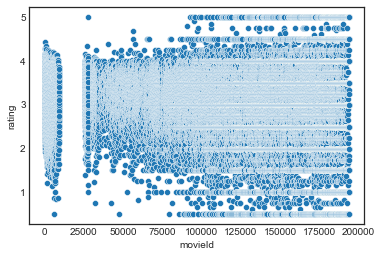

In [ ]:
sns.scatterplot(data= mean_movies_ratings, x=mean_movies_ratings.index, y='rating')

<AxesSubplot:xlabel='userId', ylabel='rating'>

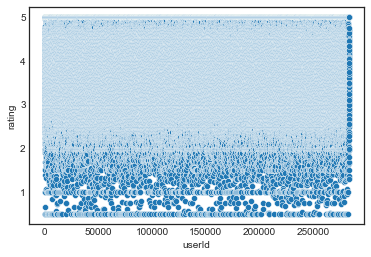

In [ ]:
# Calculate the Mean Rating of all ratings for every userID
mean_user_ratings = ratings[["userId", "rating"]].groupby("userId").agg(np.mean)
mean_user_ratings
sns.scatterplot(data= mean_user_ratings, x=mean_user_ratings.index, y='rating')

In [ ]:
# There maybe some difference in users' rating system. Some users would like to give higher ratings to every movie.
# To get a comparative rating system, I use feature scaling to get demeaned ratings (subtracting the rating by the mean rating of every user ) for every movie for each user.
# ratings["demean_ratings"] = ratings.apply(lambda x: (x["rating"] - mean_user_ratings.at[int(x["userId"]), "rating"]), axis=1)
# https://github.com/christosgkaris/Recommender_System/blob/master/recsys.py

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [ ]:
#fig, ax= plt.subplots(1, 2, figsize=(12,4),dpi=100)
#sns.scatterplot(data=ratings, x='userId', y='movieId', hue='demean_ratings', ax=ax[0])
#sns.scatterplot(data= ratings, x='movieId', y='demean_ratings', hue='userId', ax=ax[1])

- b) Vilka är de 10 filmerna med flest ratings?

In [ ]:
n_ratings = ratings[['movieId', 'userId']].groupby('movieId').count()
n_ratings = n_ratings.sort_values('userId', ascending=False)
n_ratings.rename(columns={'userId': 'n_rating'})
n_ratings = n_ratings.reset_index()

In [ ]:
n_ratings_top10 = n_ratings.merge(movies, on='movieId' ).head(10)

In [ ]:
n_ratings_top10

,movieId,userId,title,genres
0,318,97999,"Shawshank Redemption, The (1994)",Crime|Drama
1,356,97040,Forrest Gump (1994),Comedy|Drama|Romance|War
2,296,92406,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,593,87899,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
4,2571,84545,"Matrix, The (1999)",Action|Sci-Fi|Thriller
5,260,81815,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
6,480,76451,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
7,527,71516,Schindler's List (1993),Drama|War
8,110,68803,Braveheart (1995),Action|Drama|War
9,1,68469,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


- c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.

In [ ]:
mean_ratings = ratings[["movieId", "rating"]].groupby('movieId').agg(np.mean).reset_index()
mean_ratings = mean_ratings.rename(columns={'rating': 'mean_rating'})

In [ ]:
n_ratings_top10 = n_ratings_top10.merge(mean_ratings, on='movieId')
n_ratings_top10

,movieId,userId,title,genres,mean_rating
0,318,97999,"Shawshank Redemption, The (1994)",Crime|Drama,4.424188
1,356,97040,Forrest Gump (1994),Comedy|Drama|Romance|War,4.056585
2,296,92406,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.173971
3,593,87899,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.151412
4,2571,84545,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.149695
5,260,81815,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.120455
6,480,76451,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.665034
7,527,71516,Schindler's List (1993),Drama|War,4.257502
8,110,68803,Braveheart (1995),Action|Drama|War,4.008481
9,1,68469,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.886649


- d) Gör en plot över årtal och antalet filmer representerade i datasettet.

In [ ]:
pattern = r"(\(\d{4}\))"
print(f"There are {movies['title'].str.contains(pattern, regex=True).sum()} samples which has year in title.")
print(f"There are {movies['title'].str.contains(pattern, regex=True).sum()/movies.shape[0]*100:.2f}% samples has year in title.")

There are 57771 samples which has year in title.
There are 99.44% samples has year in title.


C:\Users\YunaLiu-AIU21GBG\AppData\Local\Temp\ipykernel_8684\2921997404.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(f"There are {movies['title'].str.contains(pattern, regex=True).sum()} samples which has year in title.")
C:\Users\YunaLiu-AIU21GBG\AppData\Local\Temp\ipykernel_8684\2921997404.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  print(f"There are {movies['title'].str.contains(pattern, regex=True).sum()/movies.shape[0]*100:.2f}% samples has year in title.")


In [ ]:
# r"()": regulation expression 
# \(: left bracket
# \d: numbers
# {4}: occurances of four times
# \): right bracket

pattern = r"(\(\d{4}\))"
movies['year'] = movies['title'].str.extract(pattern)
pattern = r"(\d{4})"
movies['year'] = movies['year'].str.extract(pattern)

In [ ]:
movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),1946
58094,193878,Les tribulations d'une caissière (2011),Comedy,2011
58095,193880,Her Name Was Mumu (2016),Drama,2016
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2017


In [ ]:
movies['movieId'].nunique()

58098

In [ ]:
movies_year = movies[['movieId','year']].groupby('year').count()

In [ ]:
movies_year.index.min()

'1874'

In [ ]:
movies_year.index.max()

'2018'

([Text(0.5, 1.0, 'Number of movies per year'),
   <matplotlib.axis.XTick at 0x275824b1a90>]],)

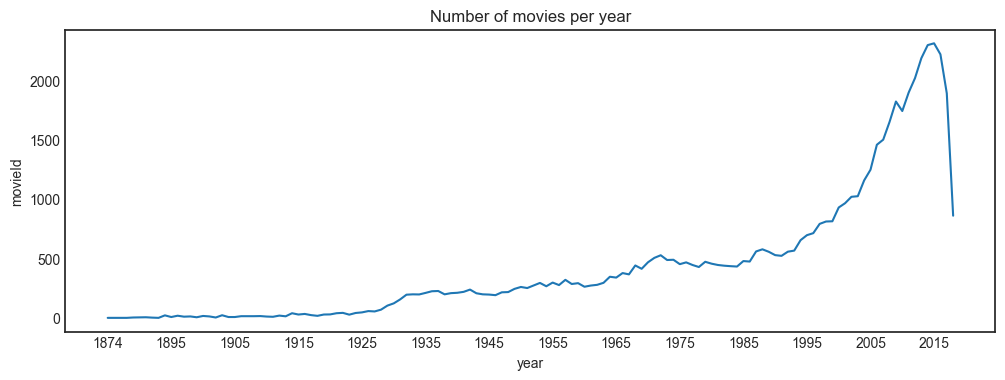

In [ ]:
fig, ax = plt.subplots(1,1,dpi=100, figsize=(12,4))
sns.lineplot(x=movies_year.index, y=movies_year['movieId'])
ax.set(title="Number of movies per year", xticks=movies_year.index[::10]),

In [ ]:
# from fuzzywuzzy import process
# similarity = process.extractOne(movie_name, df_movies['title])
# print out: ('Toy Story (1995)', 90, 0)
# 90% of similarity
# index number = 2
# index = process.extractOne(movie_name, df_movies['title])[2]


- e) Gör en plot över antalet ratings mot movieId.


In [ ]:
n_movies_ratings = ratings[["movieId", "rating"]].groupby("movieId").count()
n_movies_ratings

,rating
movieId,
1,68469
2,27143
3,15585
4,2989
5,15474
...,...
193876,1
193878,1
193880,1


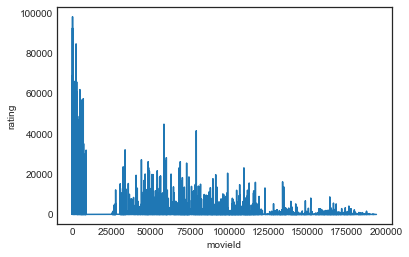

In [ ]:
sns.lineplot(x=n_movies_ratings.index, y=n_movies_ratings['rating']);

- f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över
dessa.

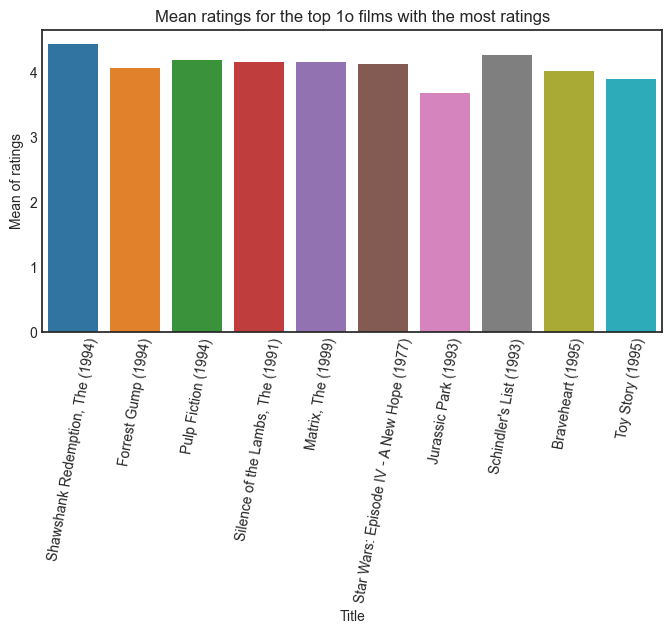

In [ ]:
fig, ax = plt.subplots(dpi=100, figsize=(8,4))
sns.barplot(x=n_ratings_top10['title'], y=n_ratings_top10['mean_rating'])
ax.set(title='Mean ratings for the top 1o films with the most ratings', xlabel='Title', ylabel='Mean of ratings')
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);

### 1.2 Skapa gles matris
Likt i videon i uppgift 1.0 skapade du en pivottabell av dataframet med index "movieId", columns "userId"
och values "ratings". Denna pivottabell är dock "dyrt" att skapa och förmodligen kommer inte din dator att
klara av skapa den om du inte filtrerar bort viss data. Fundera ut ett lämpligt sätt att filtrera ditt dataset,
pröva dig fram och motivera.
Skapa en gles (sparse) matris med hjälp av denna pivottabell.


The motivation of this project is to design a recommend system. I therefore think that this system should recommend high grating films. Given that grating is in the range of (0, 5), in this purpose, I would like to filter the data in a way that keep only mean of ratings per film is at higher than 4. 

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [32]:
# Calculate the Mean Rating of all ratings for every movieID
mean_movies_ratings = ratings[["movieId", "rating"]].groupby("movieId").agg(np.mean)
mean_movies_ratings = mean_movies_ratings.reset_index()
mean_movies_ratings = mean_movies_ratings.rename(columns={'rating':'mean_rating'})
mean_movies_ratings

,movieId,mean_rating
0,1,3.886649
1,2,3.246583
2,3,3.173981
3,4,2.874540
4,5,3.077291
...,...,...
53884,193876,3.000000
53885,193878,2.000000
53886,193880,2.000000
53887,193882,2.000000


In [33]:
ratings_copy = ratings.merge(mean_movies_ratings, on='movieId')

In [34]:
ratings_copy

,userId,movieId,rating,timestamp,mean_rating
0,1,307,3.5,1256677221,3.971727
1,6,307,4.0,832059248,3.971727
2,56,307,4.0,1383625728,3.971727
3,71,307,5.0,1257795414,3.971727
4,84,307,3.0,999055519,3.971727
...,...,...,...,...,...
27753439,282403,167894,1.0,1524243885,1.000000
27753440,282732,161572,3.5,1504408070,3.500000
27753441,283000,117857,3.5,1417317969,3.500000
27753442,283000,133409,3.5,1431539331,3.500000


In [35]:
df_ratings=ratings_copy[ratings_copy['mean_rating']>4]
df_ratings=df_ratings[['userId', 'movieId', 'rating']]

In [36]:
df_ratings=df_ratings.astype({'userId':np.int32, 'movieId':np.int32, 'rating':np.float32})

In [37]:
df_ratings.shape

(3982053, 3)

In [ ]:
df_movies=movies.index()

In [38]:
movies_users=df_ratings.pivot(index='movieId', columns='userId', values='rating').fillna(0)

In [39]:
movies_users

userId,2,3,4,5,6,7,8,9,10,11,...,283217,283218,283219,283220,283221,283222,283223,283224,283225,283228
movieId,,,,,,,,,,,,,,,,,,,,,
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,5.0,4.0,5.0,0.0,0.0,0.0,4.0,0.0,...,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,4.5,5.0,5.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
from scipy.sparse import csr_matrix
mat_movies_users = csr_matrix(movies_users.values)

### 1.3 Rekommenderarsystemet
Skapa rekommenderarsystemet med KNN och låt systemet ta input från användaren och skriva ut top 5
rekommenderade filmerna, baserat på användarens sökquery. Notera att det inte gör något för den här
labben om du tycker rekommendationerna är helt felaktiga, det här systemet vi bygger är alldeles för enkelt.
a) Beskriv med ord hur ditt system fungerar.
b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. Glöm inte
källhänvisa.

In [64]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from fuzzywuzzy import process

In [65]:
model_knn_nearest=NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
#'brute' will use a brute-force search.
model_knn_nearest.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [66]:
# recommender(movie_name) => List of Movies recommended

def recommender(movie_name, data, model,n_recommendations):
    model.fit(data)
    idx=process.extractOne(movie_name, movies['title'])[2]
    print(f"Movie Selectd: {movies['title'][idx]}, 'Index:' ,{idx}")
    
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    #print(distances, indices)
    for i in indices:
        print(f"Title: {movies['title'][i]}, and Genres: {movies['genres'][i]}")
        #print(f"{movies[['title','genres']][i].where(i!=idx)}")



In [67]:
recommender('toy story', mat_movies_users, model_knn_nearest, 5)

Title: 0                                      Toy Story (1995)
8                                   Sudden Death (1995)
30                               Dangerous Minds (1995)
42                                   Restoration (1995)
28    City of Lost Children, The (Cité des enfants p...
46                          Seven (a.k.a. Se7en) (1995)
Name: title, dtype: object, and Genres: 0     Adventure|Animation|Children|Comedy|Fantasy
8                                          Action
30                                          Drama
42                                          Drama
28         Adventure|Drama|Fantasy|Mystery|Sci-Fi
46                               Mystery|Thriller
Name: genres, dtype: object


a) First, the KNN algorithm is used to find the nearest 10 neighbors of selected, according to the cosine similartiy metrics.